In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [13]:
data4 = pd.read_pickle('Building-4-Voisins BV/building_4_cnsumptions.pkl')
data4.index = pd.to_datetime(data4.index)
#data4['Datetime'] = data4.index
data4

,Valeur
Date,
2018-03-05 00:15:00,4.044
2018-03-05 00:30:00,3.667
2018-03-05 00:45:00,3.567
2018-03-05 01:00:00,3.717
2018-03-05 01:15:00,3.843
...,...
2020-06-30 23:00:00,4.044
2020-06-30 23:15:00,3.944
2020-06-30 23:30:00,3.969


In [14]:
data4.info()
data4 = data4[~data4.index.duplicated(keep='last')]
data4 = data4.sort_index()
data4.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75840 entries, 2018-03-05 00:15:00 to 2020-01-07 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valeur  75840 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


,Valeur
Date,
2018-01-06 00:00:00,6.180
2018-01-06 00:15:00,5.954
2018-01-06 00:30:00,5.929
2018-01-06 00:45:00,6.054
2018-01-06 01:00:00,5.979


In [15]:
upsampled = data4.resample('15T').mean()
upsampled.isna().sum()

Valeur    26504
dtype: int64

In [16]:
upsampled = upsampled[:'2020-02']
upsampled = upsampled['2018-05':]

In [17]:
dataplus = upsampled
dataplus = dataplus.fillna(method='ffill')
dataplus.isna().sum()


Valeur    384
dtype: int64

In [8]:
dataplus.to_csv('./B4_Consumption_15min.csv')

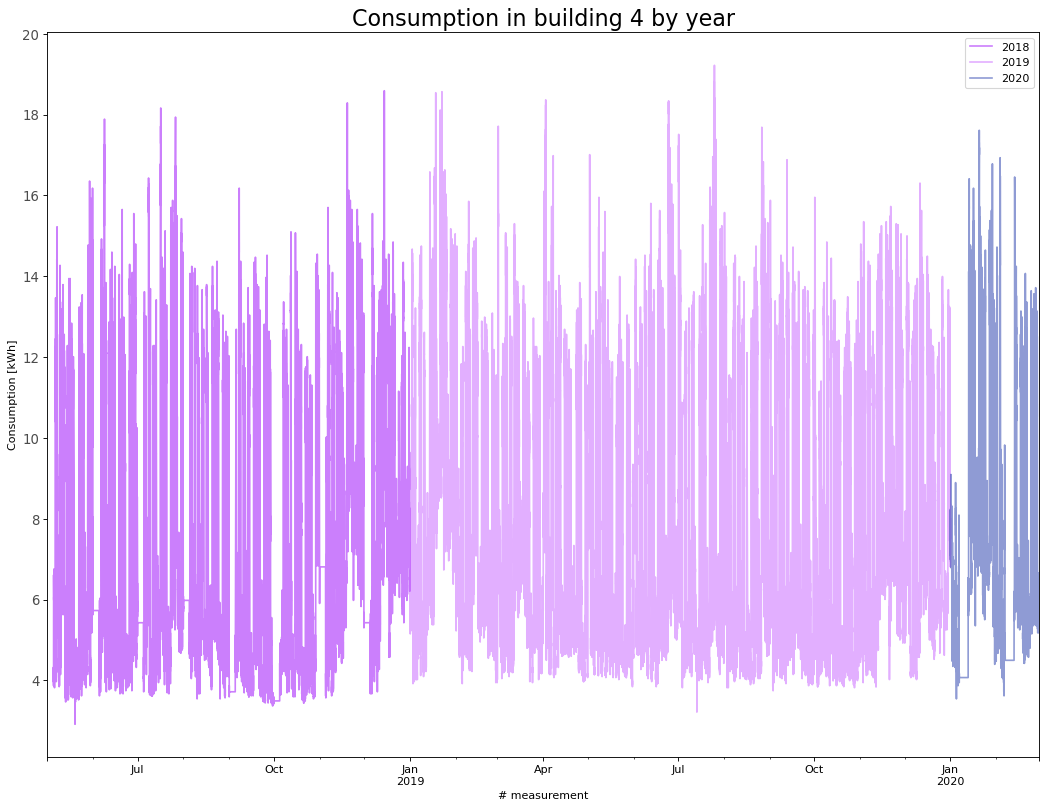

In [9]:
years = dataplus.index.year.unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=dataplus.loc[dataplus.index.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], label = year, ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Consumption in building 4 by year", fontsize=20)
plt.show()

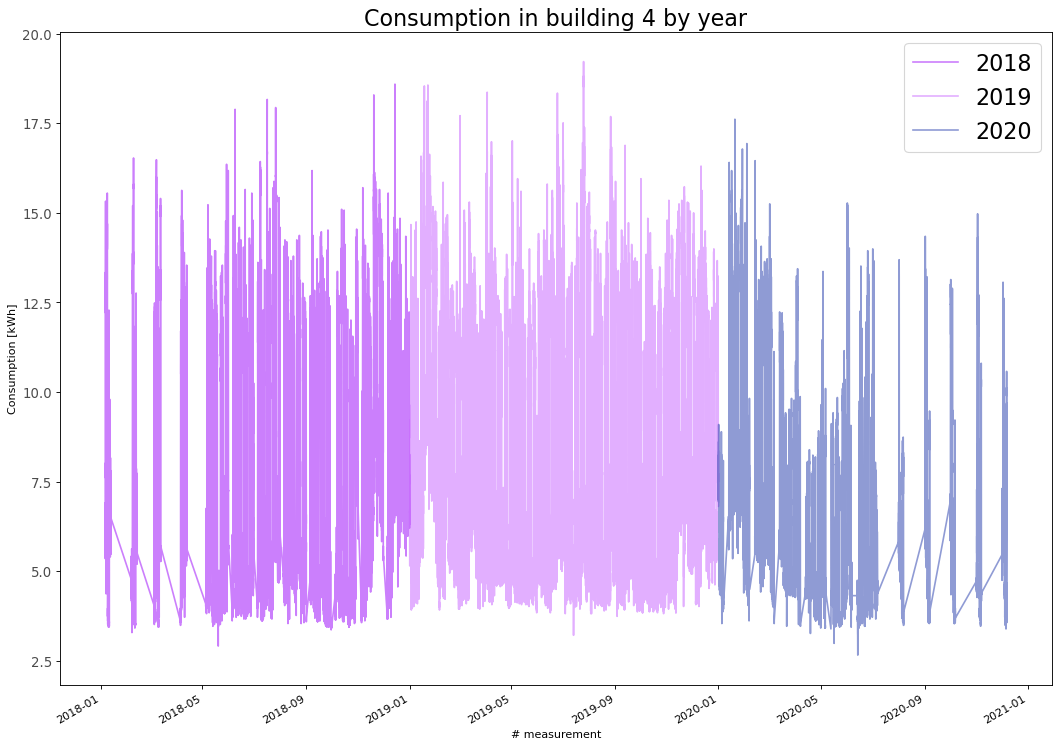

In [32]:
years = data4.index.year.unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=data4.loc[data4.index.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], label = year, ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.legend(fontsize=20)
plt.title("Consumption in building 4 by year", fontsize=20)
plt.show()